# 2.3: Fundamentals of Visualization Libraries Part 1 Task
* Import Libraries and Dataframe
* Data Wrangling & Consistency Checks
* Basic plotting with pandas
* Aggregate trips
* Final dual plot
* Code Explanation

### Import Libraries and Dataframe

In [84]:
# Import Libraries
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt

In [85]:
import matplotlib
matplotlib.__version__

'3.10.0'

In [86]:
# DataFrame is imported
df = pd.read_csv('new_york_data.csv', index_col = 0)

C:\Users\User\AppData\Local\Temp\ipykernel_22096\1684658638.py:2: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('new_york_data.csv', index_col = 0)


# Data Wrangling & Consistency Checks

In [88]:
# A general overview of the DataFrame colums is performed 
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp', '_merge'],
      dtype='object')

In [89]:
# A general overview of the first 5 rows of the DataFrame is performed to check for irregularities.
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp,_merge
0,BFD29218AB271154,electric_bike,2022-01-21 13:13:43.392,2022-01-21 13:22:31.463,West End Ave & W 107 St,7650.05,Mt Morris Park W & W 120 St,7685.14,40.802117,-73.968181,40.804038,-73.945925,member,2022-01-21,-6.0,both
1,7C953F2FD7BE1302,classic_bike,2022-01-10 11:30:54.162,2022-01-10 11:41:43.422,4 Ave & 3 St,4028.04,Boerum Pl\t& Pacific St,4488.09,40.673746,-73.985649,40.688489,-73.991160,member,2022-01-10,1.6,both
2,95893ABD40CED4B8,electric_bike,2022-01-26 10:52:43.096,2022-01-26 11:06:35.227,1 Ave & E 62 St,6753.08,5 Ave & E 29 St,6248.06,40.761227,-73.960940,40.745168,-73.986831,member,2022-01-26,-2.3,both
3,F853B50772137378,classic_bike,2022-01-03 08:35:48.247,2022-01-03 09:10:50.475,2 Ave & E 96 St,7338.02,5 Ave & E 29 St,6248.06,40.783964,-73.947167,40.745168,-73.986831,member,2022-01-03,1.4,both
4,7590ADF834797B4B,classic_bike,2022-01-22 14:14:23.043,2022-01-22 14:34:57.474,6 Ave & W 34 St,6364.1,5 Ave & E 29 St,6248.06,40.749640,-73.988050,40.745168,-73.986831,member,2022-01-22,-5.9,both


In [90]:
df = df.dropna(subset=['avgTemp'])

In [91]:
# The column _merge will be droped as it's of no use.
df.drop(columns = {'_merge'}, inplace = True)

In [92]:
df.shape

(11999379, 15)

In [93]:
# We can observe that the _merge column is anf object type
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
date                   object
avgTemp               float64
dtype: object

In [94]:
# The data type for the column 'date' is transformed into a date type format
df['date'] = pd.to_datetime(df['date'])

In [95]:
# A revision for the new data type.
df.dtypes

ride_id                       object
rideable_type                 object
started_at                    object
ended_at                      object
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
date                  datetime64[ns]
avgTemp                      float64
dtype: object

In [96]:
df.sort_values(by='date')

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp
321985,0044426DB3E6941C,classic_bike,2022-01-01 12:01:54.015,2022-01-01 12:11:58.322,E 33 St & 1 Ave,6197.08,E 33 St & 1 Ave,6197.08,40.743227,-73.974498,40.743227,-73.974498,member,2022-01-01,11.6
239146,7E230F94AD0041EB,classic_bike,2022-01-01 01:41:23.320,2022-01-01 01:46:04.352,W 21 St & 6 Ave,6140.05,Hudson St & W 13 St,6115.06,40.741740,-73.994156,40.740057,-74.005274,casual,2022-01-01,11.6
863849,8CDC7F9907659E52,electric_bike,2022-01-01 12:27:31.630,2022-01-01 12:51:11.008,Douglass St & 4 Ave,4175.14,Grand St & Greene St,5500.02,40.679279,-73.981540,40.721700,-74.002381,member,2022-01-01,11.6
965701,33CB3D136A21930F,classic_bike,2022-01-01 01:01:31.835,2022-01-01 01:36:02.221,Carmine St & 6 Ave,5763.03,Meserole Ave & Manhattan Ave,5666.04,40.730386,-74.002150,40.727086,-73.952991,member,2022-01-01,11.6
239142,5DCB2C1D6AE236A2,electric_bike,2022-01-01 02:01:53.603,2022-01-01 02:15:09.266,South St & Whitehall St,4846.01,Grand St & Elizabeth St,5382.06,40.701221,-74.012342,40.718822,-73.995960,casual,2022-01-01,11.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11786222,1922D7D70AD2A9F3,electric_bike,2022-12-31 15:12:21.416,2022-12-31 15:28:07.558,Broadway & W 131 St,7865.09,Pleasant Ave & E 120 St,7579.01,40.817422,-73.957194,40.797477,-73.931185,member,2022-12-31,8.2
11637000,67DE471A6C5B88C4,electric_bike,2022-12-31 15:01:57.968,2022-12-31 15:19:26.381,W 63 St & Broadway,7052.01,1 Ave & E 78 St,7020.09,40.771530,-73.982534,40.771404,-73.953517,member,2022-12-31,8.2
11436718,585B08BC27F740D1,classic_bike,2022-12-31 18:27:58.355,2022-12-31 18:32:42.723,South St & Pike St,5159.07,Division St & Bowery,5270.08,40.709918,-73.991611,40.714193,-73.996732,member,2022-12-31,8.2
11982564,045A8EADBD3A84DC,classic_bike,2022-12-31 14:37:36.219,2022-12-31 14:58:28.489,Centre St & Chambers St,5207.01,Pearl St & York St,4895.15,40.712733,-74.004607,40.701405,-73.987680,casual,2022-12-31,8.2


# Basic plotting with pandas

In [98]:
# The column 'data' is set to be the new index for the df_temp dataset
df_temp = df.set_index('date')

In [99]:
# A revision for the new index.
df_temp.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp
date,,,,,,,,,,,,,,
2022-01-21,BFD29218AB271154,electric_bike,2022-01-21 13:13:43.392,2022-01-21 13:22:31.463,West End Ave & W 107 St,7650.05,Mt Morris Park W & W 120 St,7685.14,40.802117,-73.968181,40.804038,-73.945925,member,-6.0
2022-01-10,7C953F2FD7BE1302,classic_bike,2022-01-10 11:30:54.162,2022-01-10 11:41:43.422,4 Ave & 3 St,4028.04,Boerum Pl\t& Pacific St,4488.09,40.673746,-73.985649,40.688489,-73.991160,member,1.6
2022-01-26,95893ABD40CED4B8,electric_bike,2022-01-26 10:52:43.096,2022-01-26 11:06:35.227,1 Ave & E 62 St,6753.08,5 Ave & E 29 St,6248.06,40.761227,-73.960940,40.745168,-73.986831,member,-2.3
2022-01-03,F853B50772137378,classic_bike,2022-01-03 08:35:48.247,2022-01-03 09:10:50.475,2 Ave & E 96 St,7338.02,5 Ave & E 29 St,6248.06,40.783964,-73.947167,40.745168,-73.986831,member,1.4
2022-01-22,7590ADF834797B4B,classic_bike,2022-01-22 14:14:23.043,2022-01-22 14:34:57.474,6 Ave & W 34 St,6364.1,5 Ave & E 29 St,6248.06,40.749640,-73.988050,40.745168,-73.986831,member,-5.9


In [100]:
df_sorted = df_temp.sort_index()

In [101]:
df_sorted.shape

(11999379, 14)

In [102]:
# Solution so to do not encounter matplotlib error 
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000  # or any number > 100, e.g. 10000

<Axes: xlabel='date'>

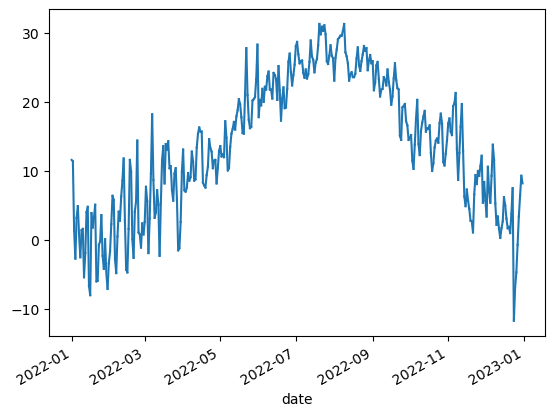

In [103]:
# Simple Line chart for the 'avgTemp' column
df_sorted['avgTemp'].plot()

In [104]:
plt.show()

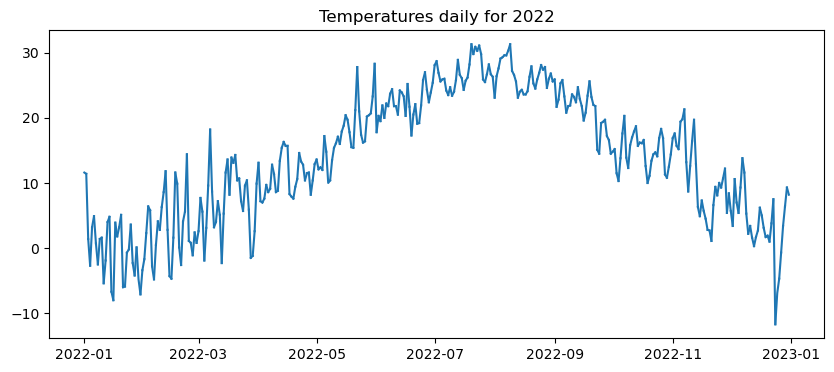

In [120]:
plt.figure(figsize=(10,4))
plt.title('Temperatures daily for 2022')
plt.plot(df_sorted['avgTemp'])
plt.show()

# Aggregate trips

In [107]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp'],
      dtype='object')

In [108]:
# Groupby the count of the trips 

df_group = pd.DataFrame(df.groupby(['date'])['ride_id'].count()).reset_index()

In [109]:
df_group.head()

,date,ride_id
0,2022-01-01,19905
1,2022-01-02,41920
2,2022-01-03,32309
3,2022-01-04,35935
4,2022-01-05,33411


In [110]:
df_group.rename(columns = {'ride_id':'bike_rides_daily'}, inplace = True)
df = df.merge(df_group, on = "date", how = 'outer', indicator = True)
print(df['_merge'].value_counts(dropna = False))
print("Shape of January 1st is", df[df['date'] == '2022-01-01'].shape) # Check 
print("Shape of January 2nd is", df[df['date'] == '2022-01-02'].shape) # Second check 

df_sorted = df.set_index('date')

print(df_sorted.columns)

_merge
both          11999379
left_only            0
right_only           0
Name: count, dtype: int64
Shape of January 1st is (19905, 17)
Shape of January 2nd is (41920, 17)
Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avgTemp', 'bike_rides_daily', '_merge'],
      dtype='object')


In [116]:
df_sorted.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,bike_rides_daily,_merge
date,,,,,,,,,,,,,,,,
2022-01-01,4A091640AEC83471,classic_bike,2022-01-01 16:01:22.082,2022-01-01 16:05:11.986,S 4 St & Wythe Ave,5204.05,Kent Ave & S 11 St,5062.01,40.712859,-73.965903,40.707645,-73.968415,member,11.6,19905,both
2022-01-01,7A560D6287C00126,classic_bike,2022-01-01 14:07:04.344,2022-01-01 14:31:57.500,Lexington Ave & E 120 St,7652.04,Amsterdam Ave & W 125 St,7800.03,40.801307,-73.939817,40.813358,-73.956461,member,11.6,19905,both
2022-01-01,4F6F726B809C15E4,classic_bike,2022-01-01 12:02:26.943,2022-01-01 12:14:13.555,Lexington Ave & E 120 St,7652.04,Amsterdam Ave & W 125 St,7800.03,40.801307,-73.939817,40.813358,-73.956461,member,11.6,19905,both
2022-01-01,3BC10DC94FD79955,classic_bike,2022-01-01 22:53:23.508,2022-01-01 23:18:42.881,Cleveland Pl & Spring St,5492.05,Mott St & Prince St,5561.04,40.722104,-73.997249,40.723180,-73.994800,member,11.6,19905,both
2022-01-01,FE4CE7F1CFFD7952,classic_bike,2022-01-01 08:04:51.755,2022-01-01 08:08:07.290,Central Park North & Adam Clayton Powell Blvd,7617.07,E 110 St & Madison Ave,7587.14,40.799484,-73.955613,40.796154,-73.947821,member,11.6,19905,both


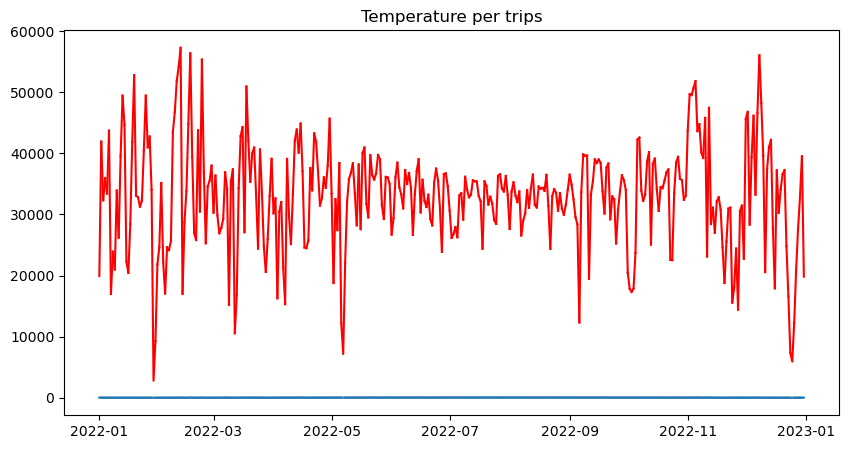

In [118]:
plt.figure(figsize=(10,5))
plt.title('Temperature per trips')
plt.plot(df_sorted['avgTemp'])
plt.plot(df_sorted['bike_rides_daily'], color = 'red')
plt.show()

# Final dual plot

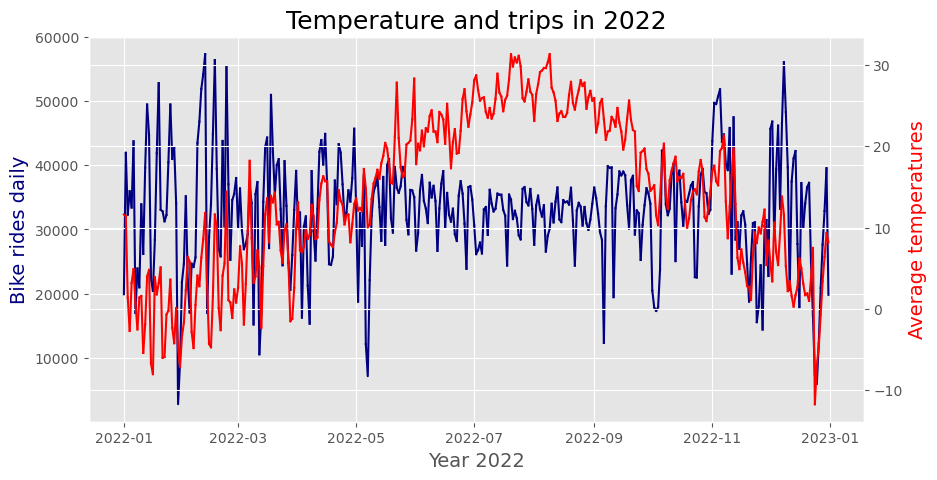

In [147]:
# Create figure and axis objects with subplots() and details

fig,ax = plt.subplots(figsize=(10, 5))

# Make a plot of the bike rides
ax.plot(df_sorted['bike_rides_daily'],color = "navy")
ax.set_xlabel("Year 2022", fontsize = 14) # set x-axis label
ax.set_ylabel("Bike rides daily",color = "navy", fontsize = 14) # set y-axis label

# Here is where we create the dual axis - initialize a twin object for two different y-axis on the sample plot
ax2 = ax.twinx()

# Make a plot with the temperatues on the y-axis using second axis object
ax2.plot(df_sorted["avgTemp"], color = "red")
ax2.set_ylabel("Average temperatures", color = "red",fontsize=14)
plt.title('Temperature and trips in 2022', fontsize = 18)
plt.show()

In [136]:
plt.style.use('ggplot')

# Code Explanation
# How did you use Matplotlib to achieve this? Which paradigm did you use?

## To achieve this visualization I used an object-oriented programming (OOP) aproach with Matplotlib, which allows me to use multiple plots as separate objects within the same figure.

## This code creates the 'Big Box' or Figure, which wiil be filled with the plots I need as axes.
### fig,ax = plt.subplots 

## This code acts as the fisrt 'object' in the 'Big Box'.
#### ax.plot(df_sorted['bike_rides_daily'],color = "navy")
#### ax.set_xlabel("Year 2022", fontsize = 14) # set x-axis label
#### ax.set_ylabel("Bike rides daily",color = "navy", fontsize = 14) # set y-axis label

## This code acts as the second 'object' in the 'Big Box'
#### ax2.plot(df_sorted["avgTemp"], color = "red")
#### ax2.set_ylabel("Average temperatures", color = "red",fontsize=14)
#### plt.title('Temperature and trips in 2022', fontsize = 18)

## This code tells Matplotlib to add a second plot sharing the same x-axis but with a different y-axis
#### ax2 = ax.twinx()

## This is the combined code:

#### fig,ax = plt.subplots(figsize=(10, 5))

#### ax.plot(df_sorted['bike_rides_daily'],color = "navy")
#### ax.set_xlabel("Year 2022", fontsize = 14) # set x-axis label
#### ax.set_ylabel("Bike rides daily",color = "navy", fontsize = 14) # set y-axis label

#### ax2 = ax.twinx()

#### ax2.plot(df_sorted["avgTemp"], color = "red")
#### ax2.set_ylabel("Average temperatures", color = "red",fontsize=14)
#### plt.title('Temperature and trips in 2022', fontsize = 18)
#### plt.show()

## In summary, by combining these objects, I created a visualization with two plots sharing the same chart, one showing daily bike rides and the other showing average temperatures, each with its own y-axis.

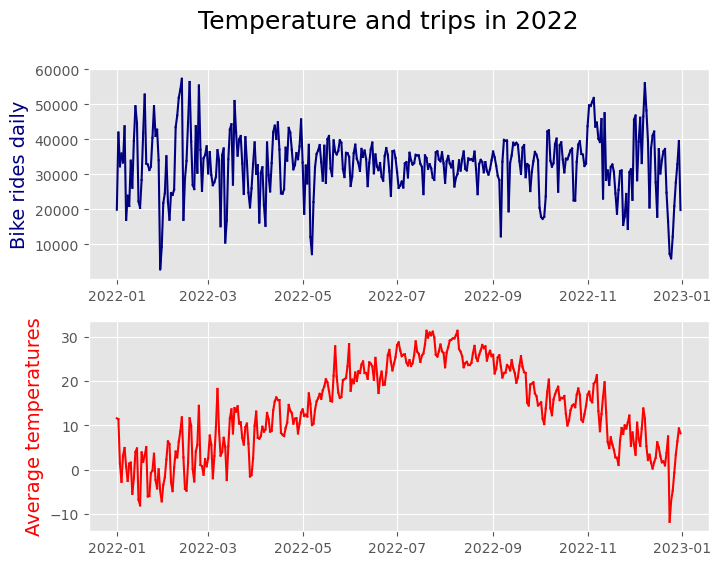

In [141]:
# Create figure and axis objects with subplots() and details

fig,ax = plt.subplots(2, figsize =(8, 6))

# Make a plot of the bike rides
ax[0].plot(df_sorted['bike_rides_daily'],color = "navy")
ax[0].set_ylabel("Bike rides daily",color = "navy", fontsize = 14) # set y-axis label

# Make a plot with the temperatues on the y-axis using second axis object
ax[1].plot(df_sorted["avgTemp"], color = "red")
ax[1].set_ylabel("Average temperatures", color = "red",fontsize=14)
plt.suptitle('Temperature and trips in 2022', fontsize = 18)

plt.show()

In [151]:
# save the plot as a file
fig.savefig('trips_temperatures_dual_line.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')


# Since we want to understand the correlation between two variables — Bike Rides and Average Temperature — the most effective way to visualize this is by plotting both on the same chart. This allows us to clearly see how they relate to each other over time. A dual-axis plot is ideal for this purpose, as it displays both series together while maintaining separate scales if needed.

